In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
# Import data
athletes = pd.read_csv("data/athletes.csv")
counts = pd.read_csv("data/counts.csv")

# This dataframe will be the final output
# Initialize as all columns of counts except 'Rank'
olympics = counts.drop(columns=['Rank'])

# Order by 'NOC' and 'Year'
olympics = olympics.sort_values(by=['NOC', 'Year'])
olympics = olympics[olympics['Year'] >= 1944]

In [132]:
# Feature 1: Total number of athletes per NOC and Year
olympics = olympics.merge(
    athletes.groupby(['NOC', 'Year']).size().reset_index(name='X.Athletes'),
    on=['NOC', 'Year'],
    how='left'
)

In [133]:
# Feature 2: Total number of events per NOC and Year
olympics = olympics.merge(
    athletes.groupby(['NOC', 'Year'])['Event'].nunique().reset_index(name='X.Events'),
    on=['NOC', 'Year'],
    how='left'
)

In [134]:
# Feature 3: Dummy variable for host country
# The year when the selected NOC hosted the Olympics
# are manually constructed from the data summerOly_host.csv

host_years = {
    'USA': [1904, 1932, 1984, 1996, 2028],
    'CHN': [2008],
    'JPN': [1964, 2020],
    'AUS': [1956, 2000],
    'FRA': [1900, 1924, 1968, 1992, 2024],
}

# Create the column 'isHost'
olympics['IsHost'] = olympics.apply(
    lambda row: 1 if row['Year'] in host_years[row['NOC']] else 0,
    axis=1
)

In [135]:
# Add country index
olympics["Country_id"] = olympics["NOC"].map({
    'USA': 1,
    'CHN': 2,
    'JPN': 3,
    'AUS': 4,
    'FRA': 5,
})

In [136]:
# Add year index
olympics["Year_id"] = olympics["Year"].apply(
    lambda x: 1 + (int(x)-1896)/4
)

In [137]:
# Save the final data
olympics.to_csv("data/olympics.csv", index=False)

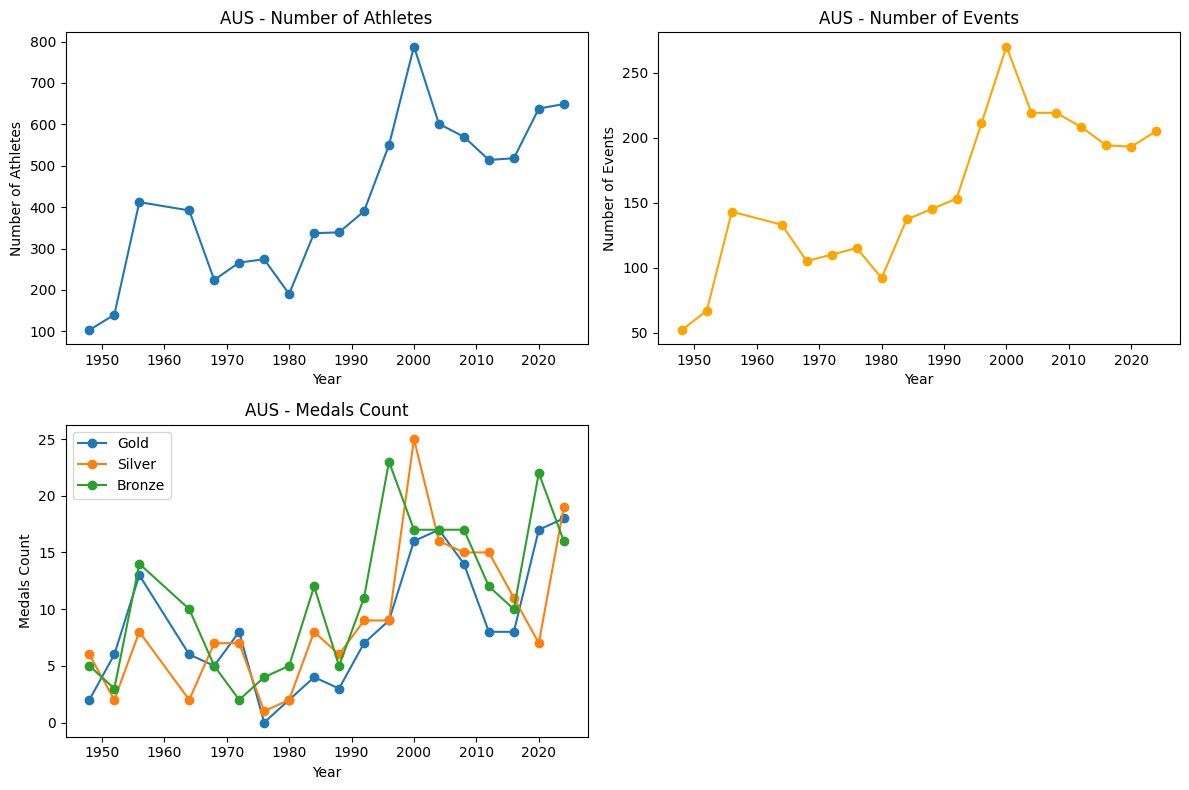

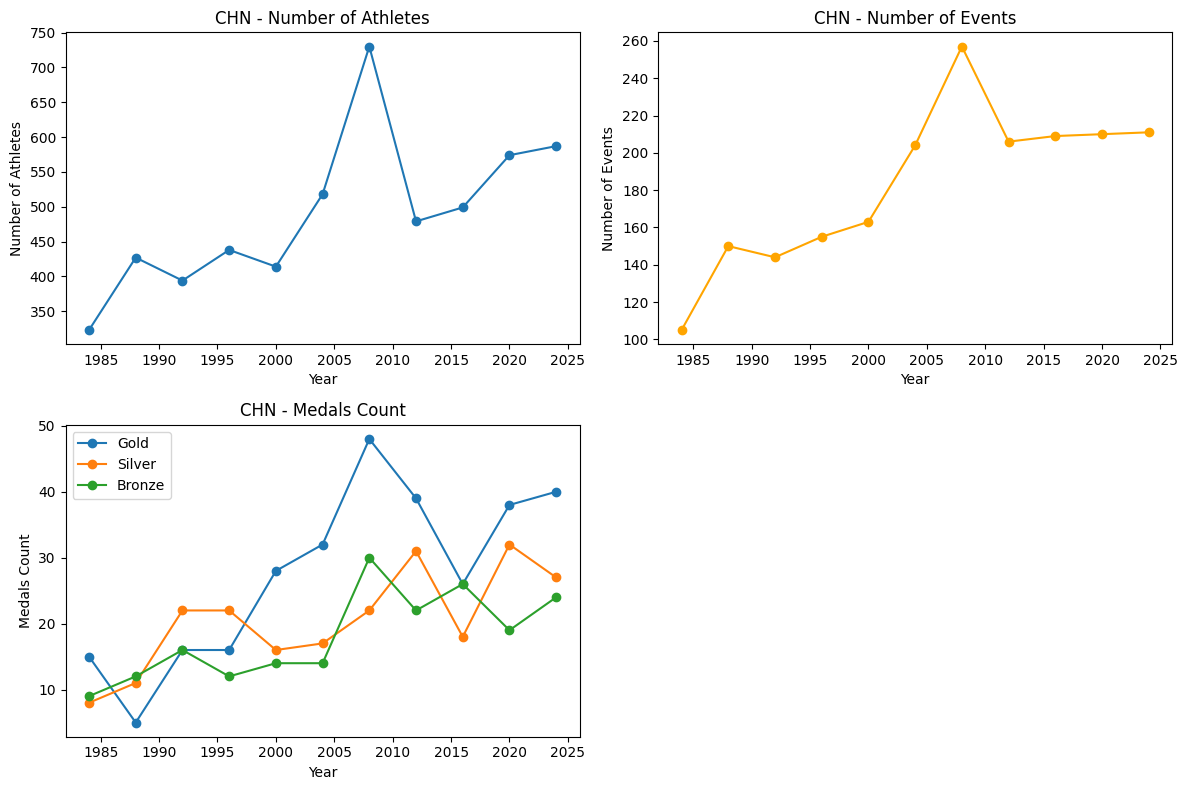

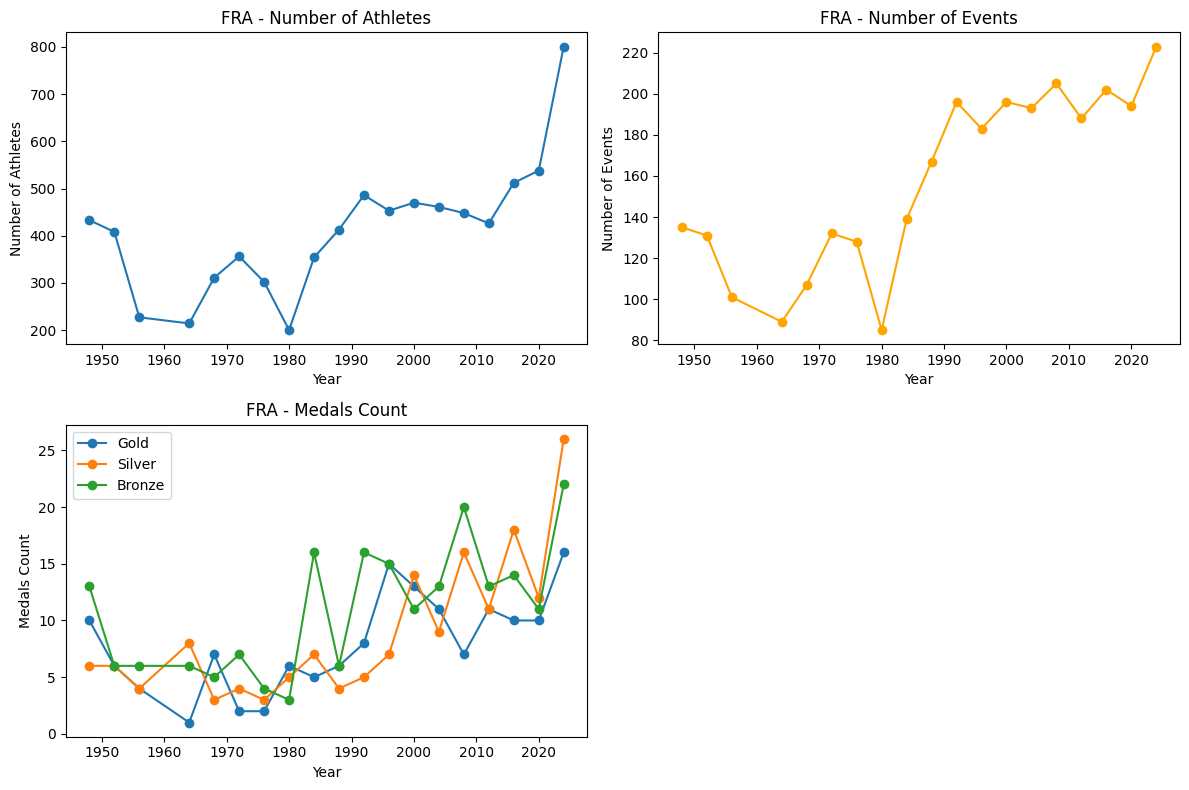

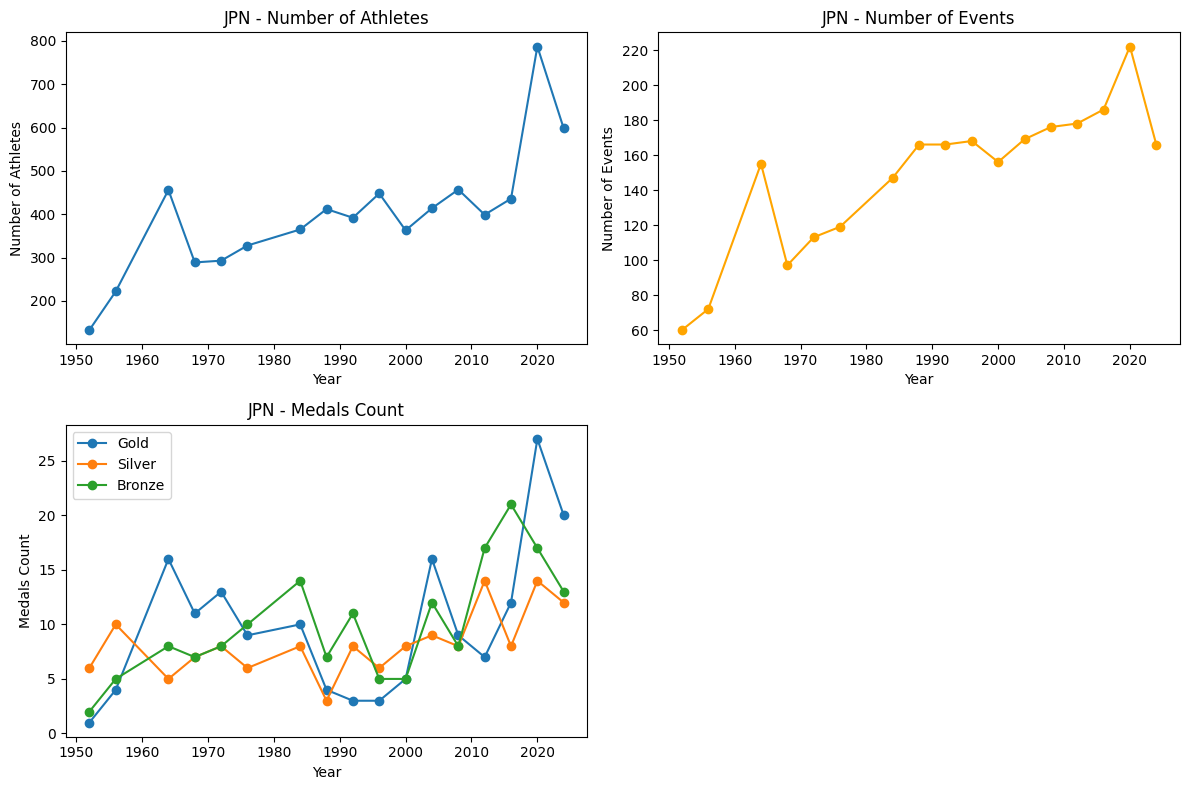

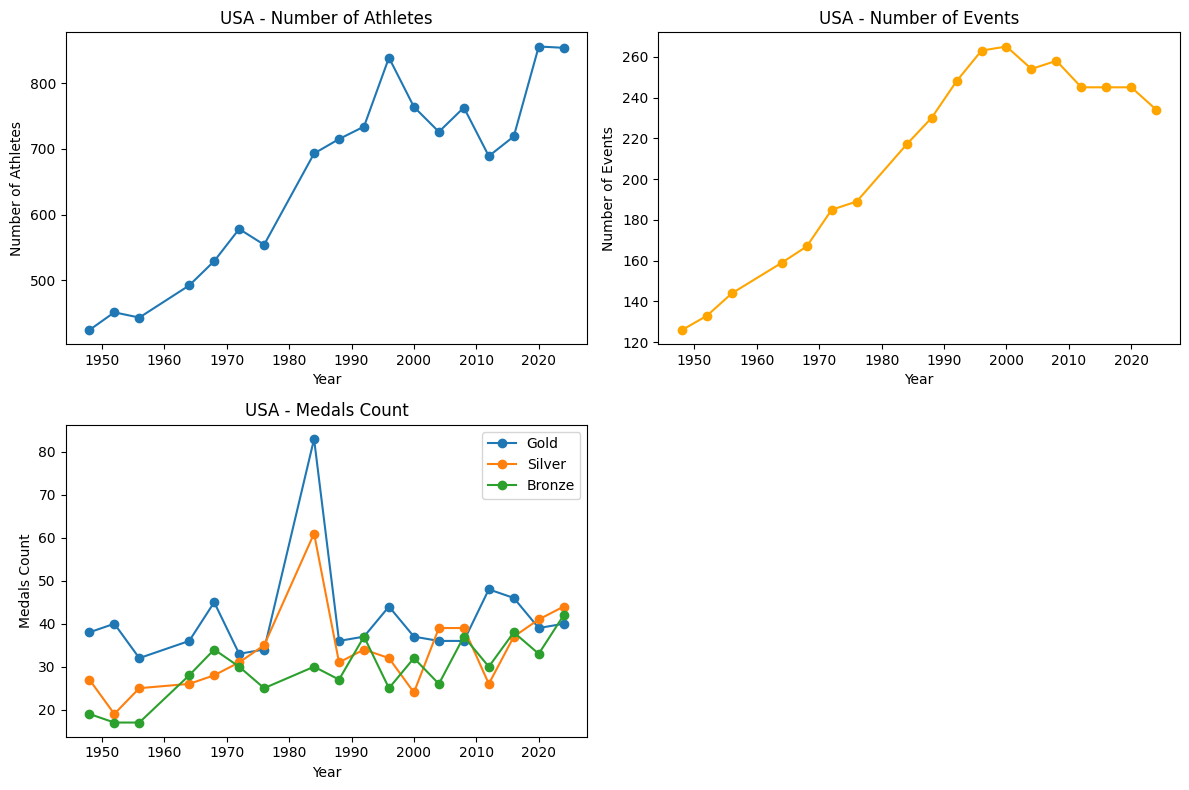

In [138]:
# Trend over years for each country
# Plot X.Athletes, X.Events and Gold, Silver, Bronze for each country

def plot_country_trends(olympics, country):
    country_data = olympics[olympics['NOC'] == country]
    plt.figure(figsize=(12, 8))
    
    # Plotting the number of athletes
    plt.subplot(2, 2, 1)
    plt.plot(country_data['Year'], country_data['X.Athletes'], marker='o')
    plt.title(f'{country} - Number of Athletes')
    plt.xlabel('Year')
    plt.ylabel('Number of Athletes')
    
    # Plotting the number of events
    plt.subplot(2, 2, 2)
    plt.plot(country_data['Year'], country_data['X.Events'], marker='o', color='orange')
    plt.title(f'{country} - Number of Events')
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    
    # Plotting medals
    plt.subplot(2, 2, 3)
    plt.plot(country_data['Year'], country_data['Gold'], marker='o', label='Gold')
    plt.plot(country_data['Year'], country_data['Silver'], marker='o', label='Silver')
    plt.plot(country_data['Year'], country_data['Bronze'], marker='o', label='Bronze')
    plt.title(f'{country} - Medals Count')
    plt.xlabel('Year')
    plt.ylabel('Medals Count')
    plt.legend()
    
    # Show the plots
    plt.tight_layout()
    plt.show()
# Plot trends for each country
countries = olympics['NOC'].unique()
for country in countries:
    plot_country_trends(olympics, country)